In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv("RasberryPi.csv")

In [3]:
data

,Time,Execution Time
0,Thu Nov 26 16:29:03 2020,3.167851
1,Thu Nov 26 16:29:05 2020,0.912467
2,Thu Nov 26 16:29:07 2020,1.013921
3,Thu Nov 26 16:29:09 2020,0.944200
4,Thu Nov 26 16:29:11 2020,0.916644
...,...,...
995,Thu Nov 26 17:03:04 2020,0.925363
996,Thu Nov 26 17:03:06 2020,0.916802
997,Thu Nov 26 17:03:08 2020,0.929213
998,Thu Nov 26 17:03:10 2020,1.024313


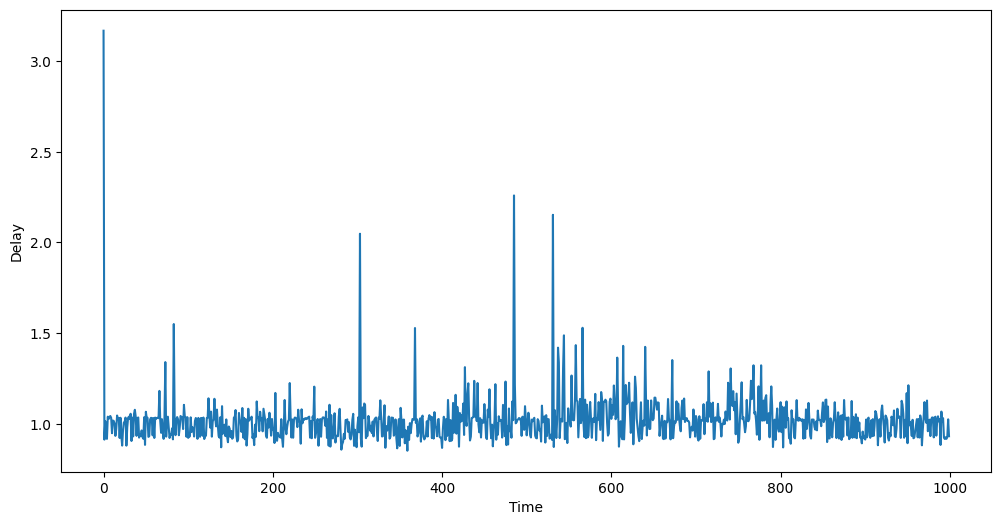

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data["Execution Time"])
plt.xlabel('Time')
plt.ylabel('Delay')
plt.show()

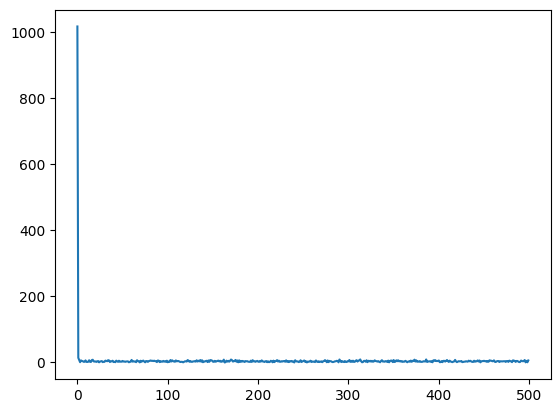

In [5]:
FFT = np.fft.fft(data["Execution Time"])
#FFT = fft.fftshift(FFT)
X = (abs(FFT))[0:len(FFT)//2]
#[0] = 0
plt.plot(X)

/home/gautham/Desktop/ML_project/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


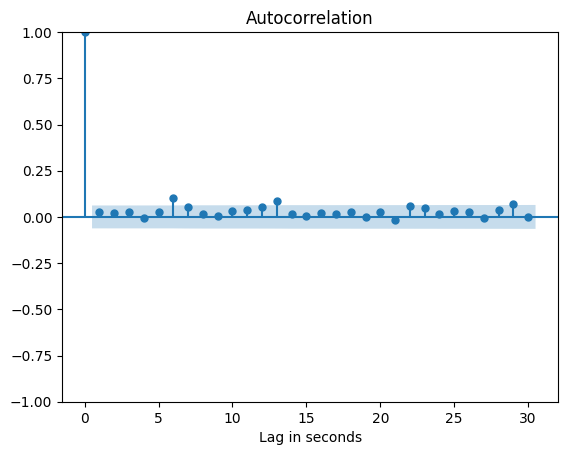

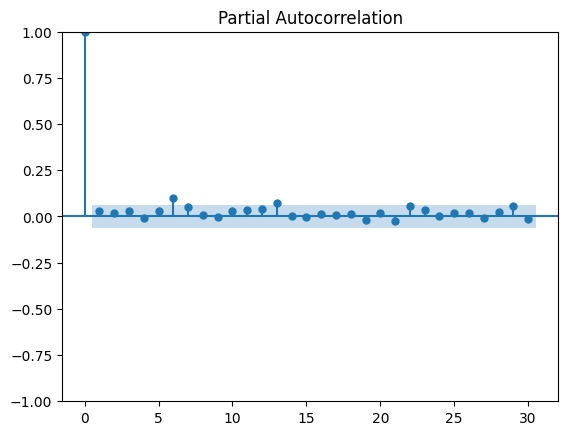

In [6]:
plot_acf(data["Execution Time"])
plt.xlabel("Lag in seconds")
plot_pacf(data["Execution Time"])
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def adf_test(timeseries):
    adf_result = adfuller(timeseries)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')
    if adf_result[0] < adf_result[4]['5%']:
        print('Data is stationary')
    else:
        print('Data is non-stationary')

adf_test(data['Execution Time'])

ADF Statistic: -6.196518378910522
p-value: 5.947121735928636e-08
Critical Values:
   1%: -3.4369927443074353
   5%: -2.864472756705845
   10%: -2.568331546097238
Data is stationary


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
train_data, test_data = train_test_split(data, test_size=0.2,shuffle=False)

In [11]:
lags = range(1, 11)
for lag in lags:
    train_data[f'lag_{lag}'] = train_data['Execution Time'].shift(lag)
    test_data[f'lag_{lag}'] = test_data['Execution Time'].shift(lag)

In [12]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [13]:
X_train = train_data.drop(['Time', 'Execution Time'], axis=1)
y_train = train_data['Execution Time']
X_test = test_data.drop(['Time', 'Execution Time'], axis=1)
y_test = test_data['Execution Time']

In [14]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
y_test

810    0.919593
811    0.932248
812    0.889865
813    1.074232
814    1.011101
         ...   
995    0.925363
996    0.916802
997    0.929213
998    1.024313
999    0.931123
Name: Execution Time, Length: 190, dtype: float64

In [16]:
y_pred = rf.predict(X_test)

In [17]:
y_pred

array([1.07867533, 1.03281851, 1.01202169, 1.02249471, 1.02894279,
       1.02238921, 1.01543904, 0.99570772, 1.00262994, 0.99408396,
       0.98747251, 1.03882736, 1.02830925, 0.98629772, 0.99256305,
       1.0372571 , 1.01949994, 1.00040295, 1.00606361, 0.99383626,
       1.00741321, 0.99411528, 0.99573825, 0.9884728 , 1.0108791 ,
       1.01011199, 0.99956653, 1.03384541, 1.020457  , 1.03396623,
       1.02207201, 0.98083615, 1.00351922, 0.97841731, 0.99667067,
       1.00762842, 0.99574826, 1.01809019, 1.02119898, 0.99921442,
       0.98408212, 1.01365518, 0.97603023, 1.05171163, 1.02784976,
       1.04162797, 1.03914687, 1.04768141, 1.00482131, 1.0331565 ,
       1.08230762, 1.00969593, 0.98357774, 1.00208311, 0.99133898,
       1.02205125, 0.98696219, 0.99755147, 0.97945459, 1.0225682 ,
       1.03644574, 0.99962777, 1.00569972, 1.07188119, 0.98364769,
       1.00683252, 1.01226664, 1.00858111, 0.98384408, 0.99331601,
       0.99888002, 1.03324321, 0.99450072, 0.98996052, 1.00761

In [18]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.8f}')

Mean squared error: 0.00500217


In [19]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
10,1.032224,1.042512,1.037695,1.026223,1.039025,0.916644,0.944200,1.013921,0.912467,3.167851
11,0.947744,1.032224,1.042512,1.037695,1.026223,1.039025,0.916644,0.944200,1.013921,0.912467
12,1.017580,0.947744,1.032224,1.042512,1.037695,1.026223,1.039025,0.916644,0.944200,1.013921
13,1.015493,1.017580,0.947744,1.032224,1.042512,1.037695,1.026223,1.039025,0.916644,0.944200
14,1.001505,1.015493,1.017580,0.947744,1.032224,1.042512,1.037695,1.026223,1.039025,0.916644
...,...,...,...,...,...,...,...,...,...,...
795,0.911093,1.022585,0.964217,0.871643,1.098378,1.205914,1.106297,0.925258,1.058179,1.013747
796,1.020253,0.911093,1.022585,0.964217,0.871643,1.098378,1.205914,1.106297,0.925258,1.058179
797,1.084125,1.020253,0.911093,1.022585,0.964217,0.871643,1.098378,1.205914,1.106297,0.925258
798,0.972025,1.084125,1.020253,0.911093,1.022585,0.964217,0.871643,1.098378,1.205914,1.106297


Text(0, 0.5, 'Delay')

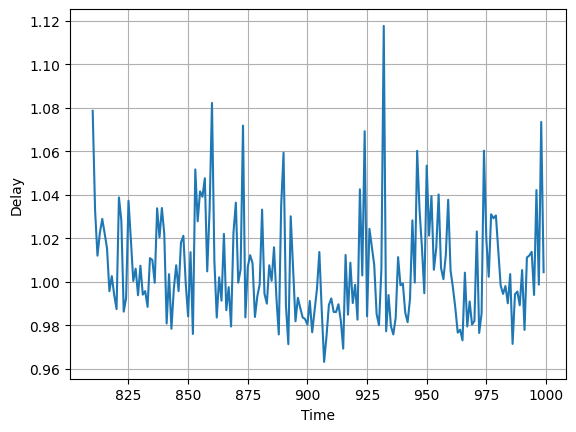

In [20]:
plt.plot(range(810,1000),y_pred)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Delay")

In [21]:
plt.plot(y_test - y_pred)
plt.xlabel(

SyntaxError: incomplete input (2495807066.py, line 2)